# Practice on Visualising Data and Logistic Regression
<hr/>

## 1. Introduction

This is my practice notebook to understand data analysis, data wrangling and logistic regression. Please visit this [youtube video](https://www.youtube.com/watch?v=VCJdg7YBbAQ&t=2716s) to learn more of the following.

## 2. About the dataset
The dataset used is the list of survivors of the Titanic sinking. This dataset is taking from the following [GitHub link](https://codeload.github.com/sonaalPradeep/datasets/zip/master).

## 3. Working with the Dataset

### 3.1 Importing the modules

The following modules will be required for loading the data and viewing statistical properties of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

Our data is stored in a CSV file, which can be read by using the <b>read_csv()</b> function n the pandas module.

In [2]:
titanic_data = pd.read_csv("titanic.csv")

In [3]:
print("The number of rows in the dataset : {}".format(len(titanic_data)))
titanic_data.head()

The number of rows in the dataset : 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Using Seaborn

Seaborn is a python library used to visualise data. It is built on matplotlib, and can be implemented in many different form. In this project, we will be using <b>countplot()</b>, which is a bar graph.

The following example shows the plot of the number of people in each class.

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


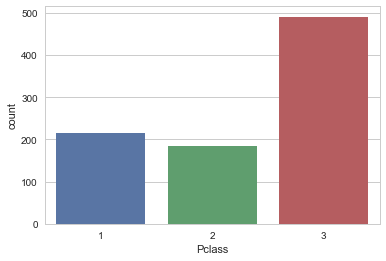

In [4]:
sns.set(style="whitegrid")   #Used to style the grid 
sns.countplot(data=titanic_data, x="Pclass")

We can also find the number of people who survived based on different categories.

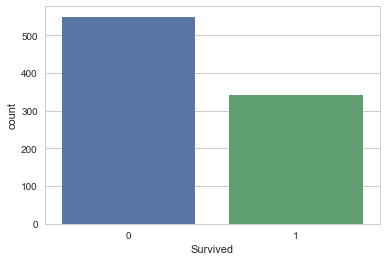

In [5]:
sns.countplot(x="Survived", data=titanic_data)

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


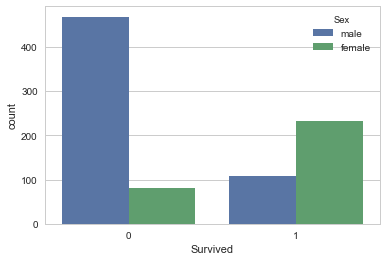

In [6]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

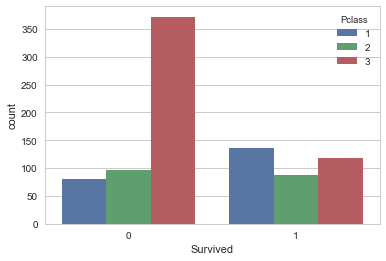

In [7]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

The entire details about the dataset can be viewed with the <b>info()</b> function

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 3.3 Data wrangling

Data wrangling involves cleaning the dataset. Here, it involves removing unavailable and unnecessary data as well as transforming the data such that it can be passed for logistic regression.

Using the <b>isnull()</b> function, we can get to know where in the dataset the null(nan) values are located.

In [9]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


It can be seen that this visualisation is too inconvinient. So another way to approach this is to find the number of null values. 

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Seaborn also has a tool which can be used to help visualise this. A heat map can be used here to view the above data in a cleaner pictorial format.

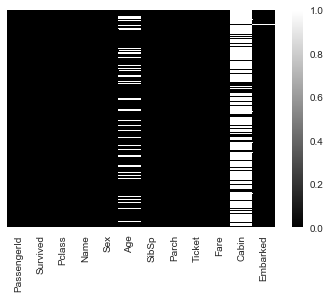

In [11]:
sns.heatmap(data=titanic_data.isnull(), cmap="gist_gray", yticklabels=False)

To perform the regression, we can remove(drop) the "Cabin" column, and remove all the other rows which have null values

In [12]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.dropna(inplace=True)

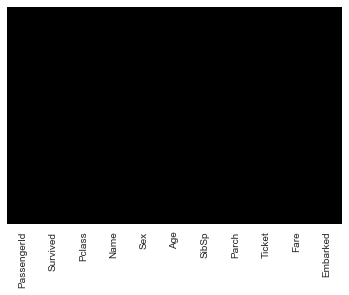

In [13]:
sns.heatmap(data=titanic_data.isnull(), cmap="gist_gray", yticklabels=False, cbar=False)

From the above map, we can see that all the null values are removed.


In [14]:
print("Number of rows in the dataset : {}".format(len(titanic_data)))
titanic_data.head()

Number of rows in the dataset : 712


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The last process which needs to be done is to remove necessary data which are in string format into numbers. This can be done by converting the categorical variables into indicator(dummy) variables.

We can even drop one of the values, because we can determine the first value from the other values.

In [15]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
Class = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


These tables can be joined with the dataset by using the <b>concat()</b> function. After concatenating these data, the original columns can be deleted.

In [18]:
titanic_data = pd.concat([titanic_data, embarked, sex, Class], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


In [19]:
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Pclass', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1


### 3.4 Logistic regression using Scikit-learn

Scikit-learn is a very commonly used library for machine learning. It has got multiple tools for modelling and even accuracy testing.

The modules to be imported for the regression and to split the data needs to be imported. The data needs to be split for training and testing.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("{} rows in the dataset is split into {} training and {} testing rows.".format(len(titanic_data),len(X_train),len(X_test)))

712 rows in the dataset is split into 569 training and 143 testing rows.


In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/sonaal/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
prediction = logmodel.predict(X_test)

### 3.5 Accuracy

Accuracy can be calculated in many different different ways.

1. Precision, recall and f1-score : 
    * Precision is the ratio of the total number of correct positives to the total number of positive predictions.
    * Recall is the ratio of the total number of correct positives to the total number of correct predictions
    * f1-score is the harmonic mean of the precision and recall.
2. Confusion matrix: A 2D representation of the predicted class vs. the actual class
3. Percentage of accuracy
    
These tools are also provided in the scikit-learn library.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        84
           1       0.80      0.66      0.72        59

   micro avg       0.79      0.79      0.79       143
   macro avg       0.79      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [26]:
print(confusion_matrix(y_test, prediction))

[[74 10]
 [20 39]]


In [27]:
accuracy_score(y_test, prediction)

0.7902097902097902